In [1]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix


# Prepare Data

In [2]:
iris = pd.read_csv(r"C:\Users\ammar\Downloads\Iris.csv")
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Removing unneeded column, Id column is like serial number for each data points.
iris.drop('Id', axis=1, inplace=True)

# Explore

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Iris_data contain total 6 features in which 4 features (SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalwidthCm) are independent features and 1 feature(Species) is dependent or target variable. 

In [5]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
iris.shape

(150, 5)

In [7]:
iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

All Independent features has not-null float values and target variable has class labels(Iris-setosa, Iris-versicolor, Iris-virginica)

In [8]:
# Samples from each species
iris["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

As we can see that each class (species) has the same number of data points, our data is said to be a balanced dataset. No class is completely dominant in our data set.

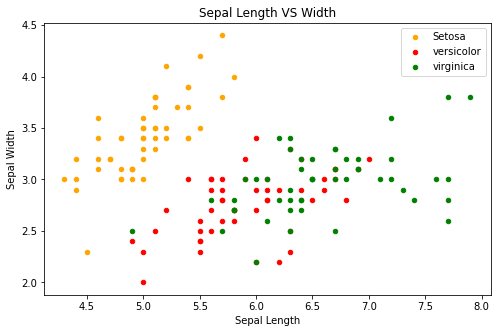

In [9]:
# EDA (exploratory data analysis) for Sepal length and width.
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

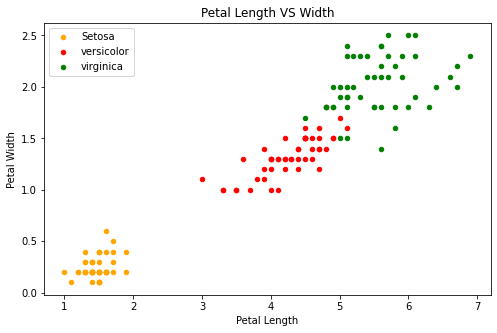

In [10]:
# For Petal length and width.
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='red', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title("Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

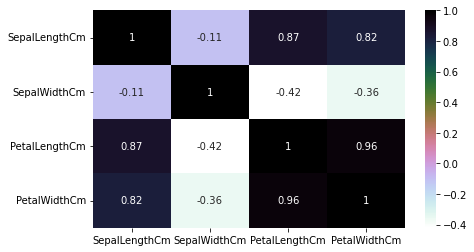

In [11]:
# Correlation
plt.figure(figsize=(7,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r')
plt.show();

There is low bias(high correlation) between PetalLengthCm and PetalWidthCm wich is good at predictions.

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

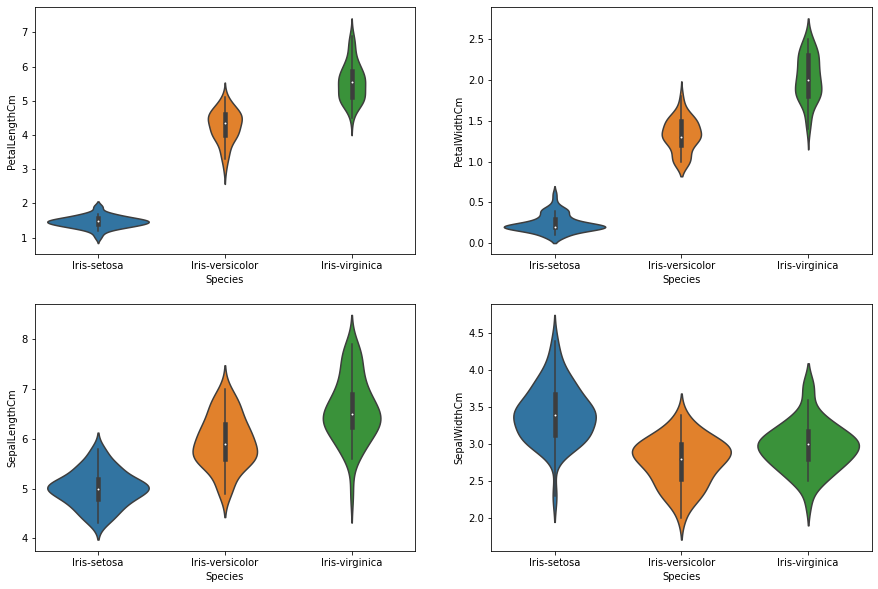

In [12]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y='PetalLengthCm', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y='PetalWidthCm', data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='Species', y='SepalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y='SepalWidthCm', data=iris)

The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density


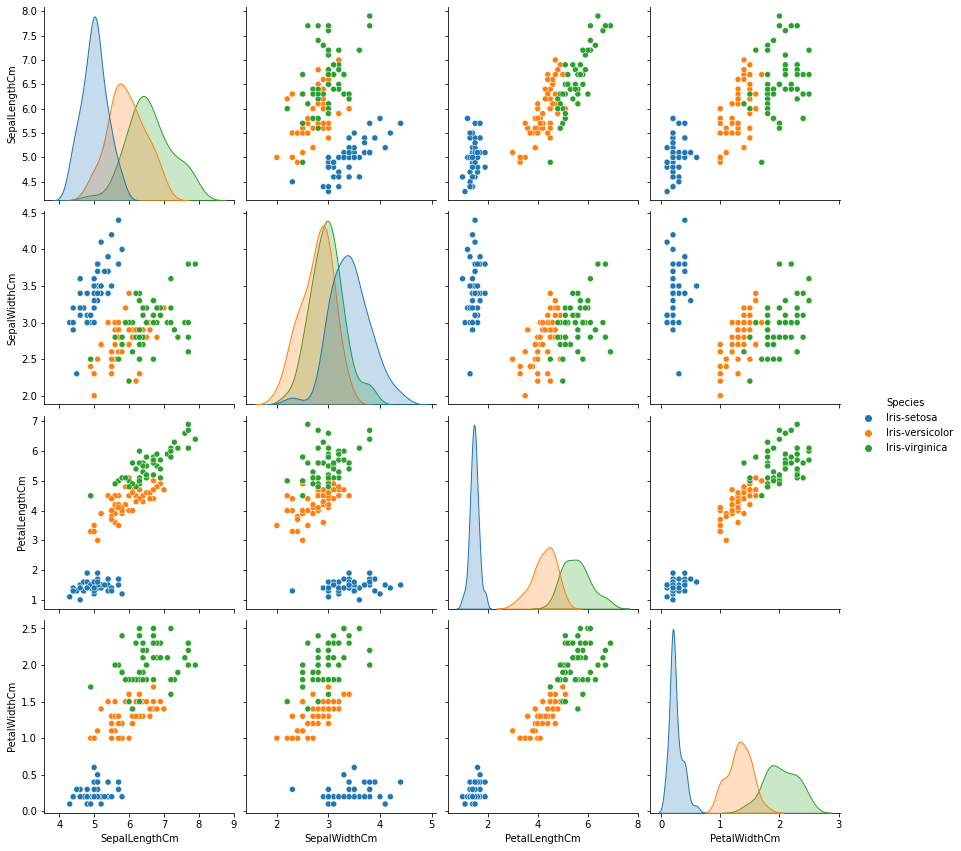

In [13]:
#Using pairplot to analyze the relationship between species for all characteristic combinations. 
sns.pairplot(iris, hue="Species", height=3)
plt.show();


As we can see that the Petal Features are giving a better class division compared to the Sepal Features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

# Split Data

In [14]:
x = iris.drop('Species', axis=1)
y = iris['Species']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)
xt, xcv, yt, ycv = train_test_split(x_train, y_train, test_size=0.10, random_state=42)

# Building Classification Model

In [20]:
#conda install python-graphviz

In [15]:
from sklearn.metrics import classification_report, accuracy_score
import graphviz
model = DecisionTreeClassifier(criterion='gini', max_depth=5).fit(xt,yt)


Visualizing Decision Tree using graphviz library

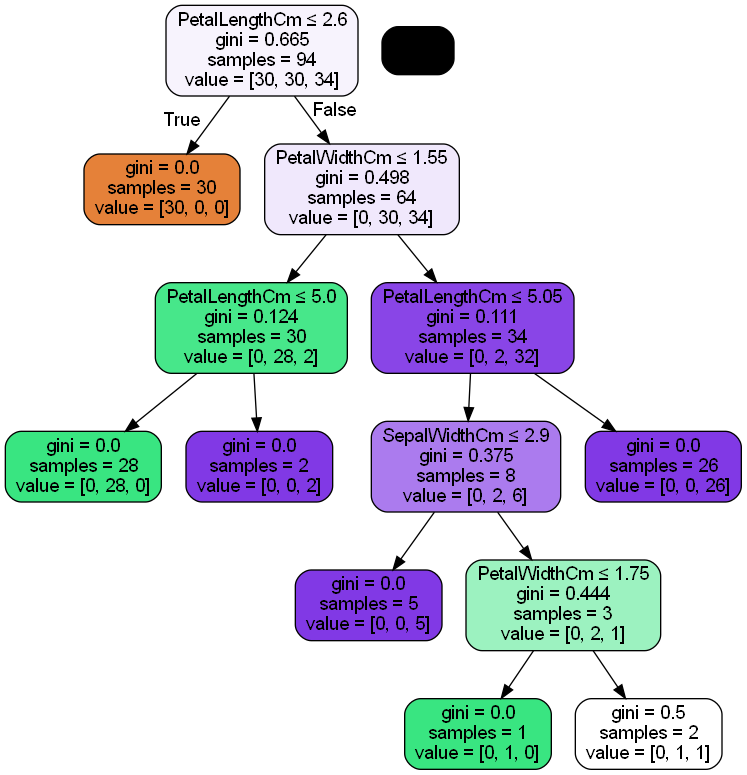

In [16]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names= x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DT_model_Tree.png')
Image(graph.create_png())

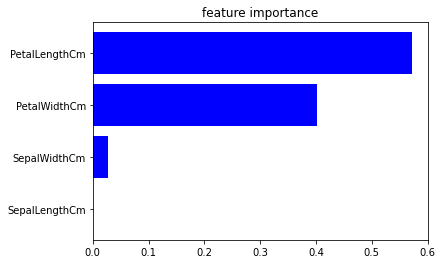

In [19]:
features = x.columns
importance = model.feature_importances_
indices = np.argsort(importance)
plt.title('feature importance')
plt.barh(range(len(indices)), importance[indices], color='b')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.show()

In [20]:
# Depth of the decision tree.
model.tree_.max_depth

5

Now we can validate our Decision tree using cross validation method to get the accuracy or performance score of our model.

In [21]:
print('The accuracy of the DecisionTree is:',cross_val_score(model, xt, yt, cv=3, scoring='accuracy').mean())

The accuracy of the DecisionTree is: 0.9361559139784946


Checking validation test data on our trained model and getting performance metrics.

In [32]:
y_prd = model.predict(xcv)
print('The accuracy score of validation test data is :',accuracy_score(ycv, y_prd))
multilabel_confusion_matrix(ycv, y_prd)

The accuracy score of validation test data is : 0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]], dtype=int64)

Checking our model performance on actual unseen test data

In [26]:
yt_prd = model.predict(x_test)
print('The accuracy score of validation test data is :',accuracy_score(y_test, yt_prd)*100,'%')
multilabel_confusion_matrix(y_test, yt_prd)

The accuracy score of validation test data is : 97.77777777777777 %


array([[[26,  0],
        [ 0, 19]],

       [[31,  1],
        [ 0, 13]],

       [[32,  0],
        [ 1, 12]]], dtype=int64)

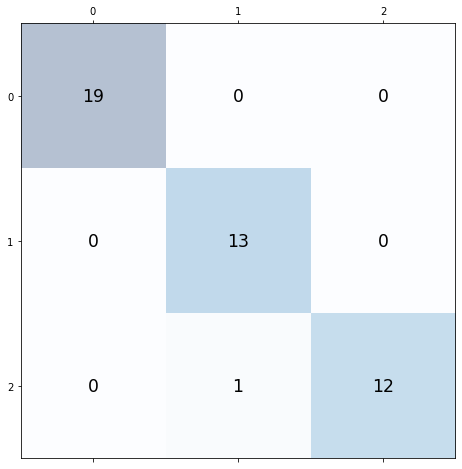

In [27]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=yt_prd)

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_mat, cmap= plt.cm.Blues, alpha=0.3)

for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(x=j, y=i, s=conf_mat[i,j], va='center', ha='center', size='xx-large')

# Training model on Actual train data

In [34]:
iris_clf = DecisionTreeClassifier(criterion='gini', min_samples_split=2).fit(x_train,y_train)

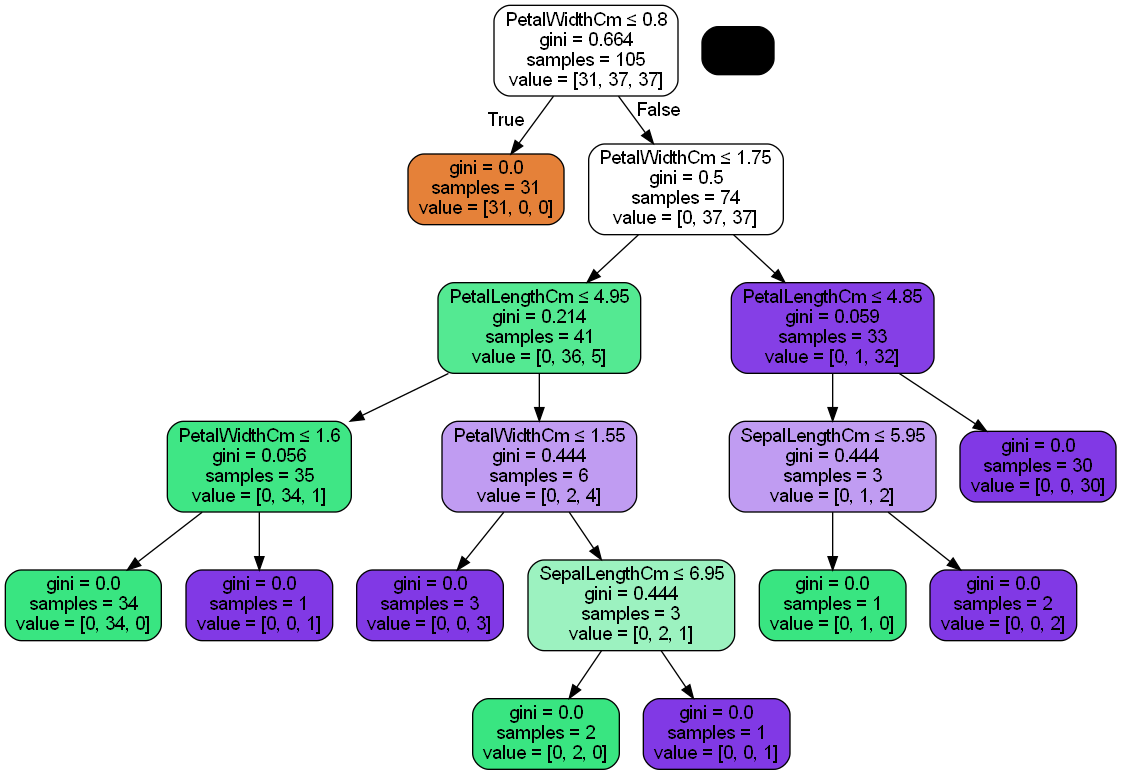

In [37]:
dot_data = StringIO()
export_graphviz(iris_clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True, feature_names= x.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('DT_model_Tree.png')
Image(graph.create_png())

Checking the performance of model on Actual Test data

In [41]:
y_pred = iris_clf.predict(x_test)
print('The accuracy of the DecisionTree is:',accuracy_score(y_test, y_pred)*100,'%')

The accuracy of the DecisionTree is: 100.0 %
